Exchange rates are one of the most interesting aspects of the global economy. Understanding exchange rates is vital for central banks, import-export businesses, and expatriates. Exchange rates can be affected by a myriad of factors. But what factors exactly? This article will perform a linear regression and explore the relationship between Japanese GDP and the Dollar-Yen exchange rate.


### Steps for Regression

1. Research Question and Data
2. Estimate the Correlation and Regression Coefficients (r and Least Squares)
3. Assess Accuracy of Coefficient Estimates (Error)
4. Hypothesis Testing and Significance (T statistic and P value)
5. Plot Regression Line
6. Assess the Accuracy of the Model (Residual Standard Error)
7. Plot Residuals

In [1]:
from pandas import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(12,9)

Populating the interactive namespace from numpy and matplotlib


/home/nova/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['unique', 'test', 'info', 'types', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import scipy 
from scipy import stats
from scipy.stats import t

In [3]:
import sklearn
from sklearn.linear_model import LinearRegression

### Step 1. Research Question and Data

What is the relationship between the Dollar-Yen Exchange rate and Japanese GDP? Does GDP affect the Exchange Rate?

The data can be accessed via the Federal Reserve Economic Database. Make sure to set the frequency to quarterly. Download files as .csv.

https://fred.stlouisfed.org/series/JPNNGDP

https://fred.stlouisfed.org/series/DEXJPUS

In [4]:
yen_dollar = 'DEXJPUS.csv'

jp_gdp = 'JPNNGDP.csv'

In [5]:
exchange = read_csv(yen_dollar)

jp_gdp = read_csv(jp_gdp)

In [6]:
new_table = pd.merge(jp_gdp,exchange)

In [7]:
new_table

,DATE,JPNNGDP,DEXJPUS
0,2006-01-01,525526.8,115.48
1,2006-04-01,526522.3,117.07
2,2006-07-01,524676.2,115.77
3,2006-10-01,530801.0,118.61
4,2007-01-01,533919.5,120.45
5,2007-04-01,533642.5,118.93
6,2007-07-01,529539.0,121.41
7,2007-10-01,529607.5,115.87
8,2008-01-01,530472.2,107.82
9,2008-04-01,525946.8,102.68


In [8]:
new_table.columns = ['DATE','JPN_GDP','USD_JPY_EXCHANGE']
new_table.head()

,DATE,JPN_GDP,USD_JPY_EXCHANGE
0,2006-01-01,525526.8,115.48
1,2006-04-01,526522.3,117.07
2,2006-07-01,524676.2,115.77
3,2006-10-01,530801.0,118.61
4,2007-01-01,533919.5,120.45


In [9]:
new_table = DataFrame(new_table)

new_table.head()

,DATE,JPN_GDP,USD_JPY_EXCHANGE
0,2006-01-01,525526.8,115.48
1,2006-04-01,526522.3,117.07
2,2006-07-01,524676.2,115.77
3,2006-10-01,530801.0,118.61
4,2007-01-01,533919.5,120.45


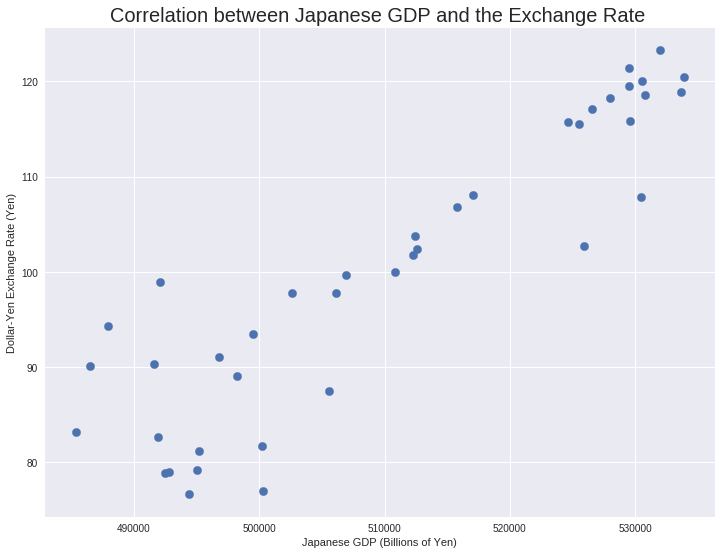

In [10]:
jp_gdp_exch_scatt = new_table.plot('JPN_GDP','USD_JPY_EXCHANGE',grid=True, kind='scatter', s = 70)

jp_gdp_exch_scatt.set_title('Correlation between Japanese GDP and the Exchange Rate ', fontsize = 20)

jp_gdp_exch_scatt.set_xlabel('Japanese GDP (Billions of Yen)')

jp_gdp_exch_scatt.set_ylabel('Dollar-Yen Exchange Rate (Yen)')

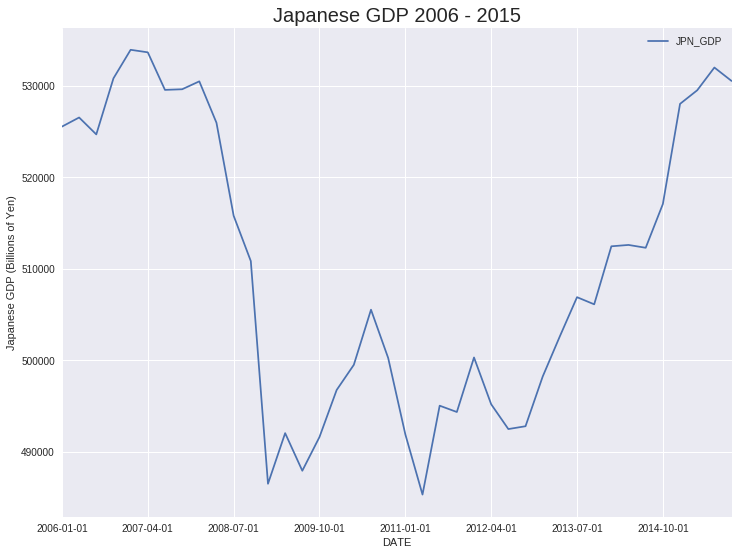

In [11]:
jp_gdp_plot = new_table[['DATE','JPN_GDP']].set_index('DATE').plot()

jp_gdp_plot.set_title('Japanese GDP 2006 - 2015', fontsize =20)

jp_gdp_plot.set_ylabel('Japanese GDP (Billions of Yen)')

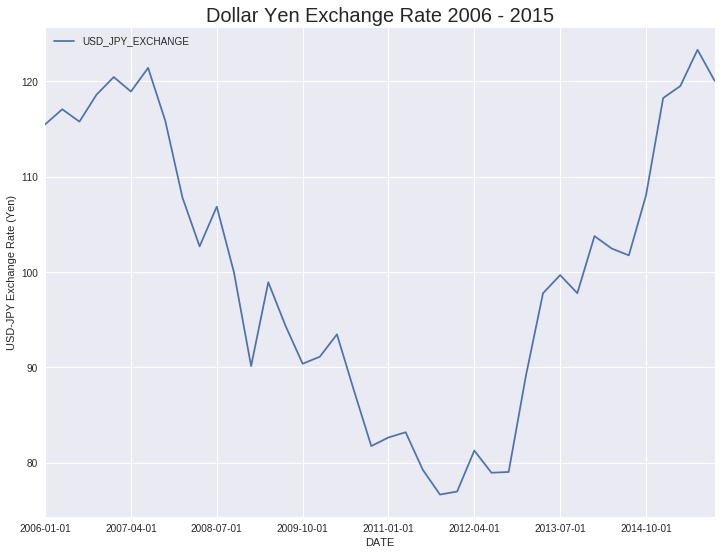

In [12]:
exchange_plot = new_table[['DATE','USD_JPY_EXCHANGE']].set_index('DATE').plot()

exchange_plot.set_title('Dollar Yen Exchange Rate 2006 - 2015', fontsize =20)

exchange_plot.set_ylabel('USD-JPY Exchange Rate (Yen)')

The scatter plot seems almost linear and the line graphs show similar behaviors between the Exchange rate and GDP over the same time period. 

### Step 2. Estimate Coefficients (using r and least squares)

What is the relationship between these data sets? Are they even correlated?

The regression model is: y' = a + bx

Where b is the slope and a is the intercept.

Therefore: (Yen-Dollar Exchange) = a + b(Japan_GDP)

In [13]:
new_table.head(0)

,DATE,JPN_GDP,USD_JPY_EXCHANGE


In [14]:
#First find Sums of X, Y, x^2, y^2 and XY

jpn_gdp_Column = new_table['JPN_GDP']
exchange_Column = new_table['USD_JPY_EXCHANGE']

In [15]:
jpn_gdp_Column.describe()

count        40.000000
mean     510324.442500
std       16077.722066
min      485323.200000
25%      495151.150000
50%      508861.150000
75%      526894.725000
max      533919.500000
Name: JPN_GDP, dtype: float64

In [16]:
exchange_Column.describe()

count     40.00000
mean     100.19200
std       14.99295
min       76.64000
25%       88.67000
50%       99.82000
75%      115.79500
max      123.31000
Name: USD_JPY_EXCHANGE, dtype: float64

In [17]:
#Sum of X

jpn_gdp_Column.sum()

20412977.700000003

In [18]:
#Sum of Y

exchange_Column.sum()

4007.68

In [19]:
#Sum of X times Y

x_y = jpn_gdp_Column*exchange_Column

x_y.sum()

2053739718.5369997

In [20]:
#Sum of X squared

jpn_gdp_sq = jpn_gdp_Column**2

In [21]:
jpn_gdp_sq.sum()

10427322697243.832

In [22]:
#Sum of Y squared

exchange_sq = exchange_Column**2

In [23]:
exchange_sq.sum()

410304.22839999996

In [24]:
#Set variables

X = new_table.JPN_GDP

X = np.vstack(new_table.JPN_GDP)

Y = new_table.USD_JPY_EXCHANGE

Y = np.vstack(new_table.USD_JPY_EXCHANGE)

In [25]:
X = np.array([ [value,1] for value in X])

In [26]:
#Find Correlation Coefficients with numpy
# [[1          correlation(x, y)]
# [correlation(y, x)          1]]

corr = np.corrcoef(jpn_gdp_Column,exchange_Column)

print('The correlational coefficient (r) is %.3f' %corr[0][1])

The correlational coefficient (r) is 0.907


In [27]:
#Use numpy Least Squares (lstsq) to find the Regression Coefficients

regression = np.linalg.lstsq(X,exchange_Column)

In [28]:
regression

(array([  8.45398281e-04,  -3.31235407e+02]),
 array([ 1561.71441487]),
 2,
 array([  3.22913653e+06,   1.96652924e-01]))

In [29]:
print('The slope is %.4f' %regression[0][0])
print('The y intercept is %.3f' %regression[0][1])

The slope is 0.0008
The y intercept is -331.235


### Step 3. Assess Accuracy of Coefficient Estimates (Get Error)

In [30]:
#Get error

total_error = regression[1]

In [31]:
print('The total error was %.3f' %total_error[0])

The total error was 1561.714


In [32]:
#Get Root Mean Sqaure Error

rmse = np.sqrt(total_error/len(X))

In [33]:
print('The root mean squared error was %.2f' %rmse)

The root mean squared error was 6.25


There's a 95% chance that any given exchange rate in this time period will be within 2 times this error, or 12.5  yen away from the fit line.

### Step 4. Hypothesis Testing and Significance 


#### State Hypothesis

Null
H_0: There is no relationship between X and Y (H_0: B_1 = 0)

Alternative
H_1: There is a relationship between X and Y  (H_1: B_1 != 0)

#### Significance 

Choose significance level (alpha) 

95%, or a = 0.05

#### Calculate the Test Value (t statistic)

In [34]:
#find t-statistic

r = 0.907

t = ((r)*np.sqrt((40-2)/(1-(r**2))))

print('The t-statistic is %.3f' %t)

The t-statistic is 13.276


#### Calculate the P Value 

In [35]:
from scipy.stats import t

#pass t statistic and degrees of freedom
#checked by hand

pvalue = t.sf(13.276, 2)

print('The p-value is %f' %pvalue)

The p-value is 0.002813


#### Statistical Decision

Where does our test lie?

The test results lie in the rejection region, as per a two tailed test (!=) with a 0.05 (95%) confidence interval.

The p-value is well bellow 0.05.

#### Conclusion

Reject Null Hypothesis or not?

The hypothesis that there is no relationship between GDP and the Exchange rate can be rejected, or at least not accepted.

### Step 5. Plot Regression

In [36]:
m , b = np.linalg.lstsq(X,Y)[0]

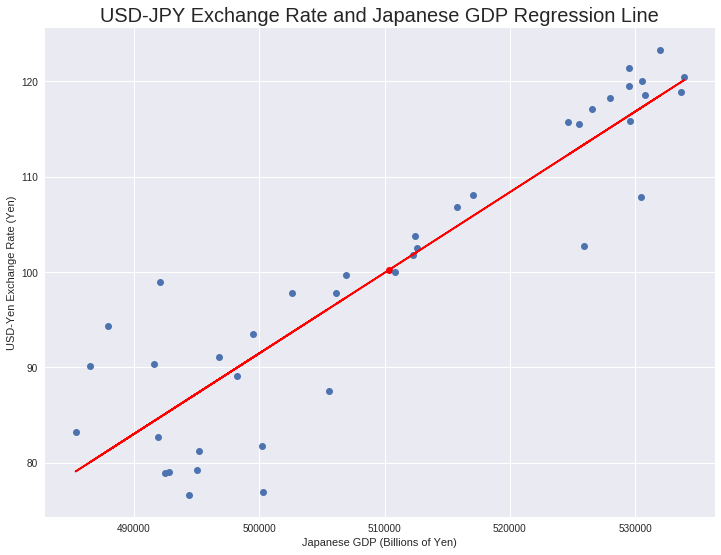

In [37]:
#Plot centroid using X and Y means

plt.plot([510324.442500], [100.192], marker='o', markersize=7, color="red")

#Plot best fit line

plt.plot(jpn_gdp_Column,exchange_Column, 'o')

x = new_table.JPN_GDP

plt.plot(x, m*x + b, 'r')

plt.title('USD-JPY Exchange Rate and Japanese GDP Regression Line',fontsize=20)

plt.xlabel('Japanese GDP (Billions of Yen)')

plt.ylabel('USD-Yen Exchange Rate (Yen)')

### Step 6. Assess the Accuracy of the Model (Residual Standard Error, R Squared and Residual Plot)

In [52]:
# Find RSE
# RSS = total error
RSE = np.sqrt((1/(40-2))*total_error)

In [53]:
print('The residual standard error was %.2f' %RSE)

The residual standard error was 6.41


In [40]:
# Find R^2 

r_sq = r**2

print('The percentage of the variability of Y that was explained by X (R^2) is %.3f' %r_sq)

The percentage of the variability of Y that was explained by X (R^2) is 0.823


### Step 7. Plot Residuals  (Machine Learning)

In [41]:
#Grab the output and set as X and Y test and train data sets 

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,new_table.USD_JPY_EXCHANGE)

In [42]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(30, 2) (10, 2) (30,) (10,)


In [43]:
#Predicting

#Create our regression object
lreg = LinearRegression()

#Once again do a linear regression, except only on the training sets 
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
#Run a prediction on both the training set and testing set

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [45]:
#Now take the mean square error (MSE)

print('Fit a model X_train, and calculate the MSE with Y_train: %.2f' % np.mean((Y_train - pred_train)**2))
print('Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f' % np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate the MSE with Y_train: 42.31
Fit a model X_train, and calculate MSE with X_test and Y_test: 31.82


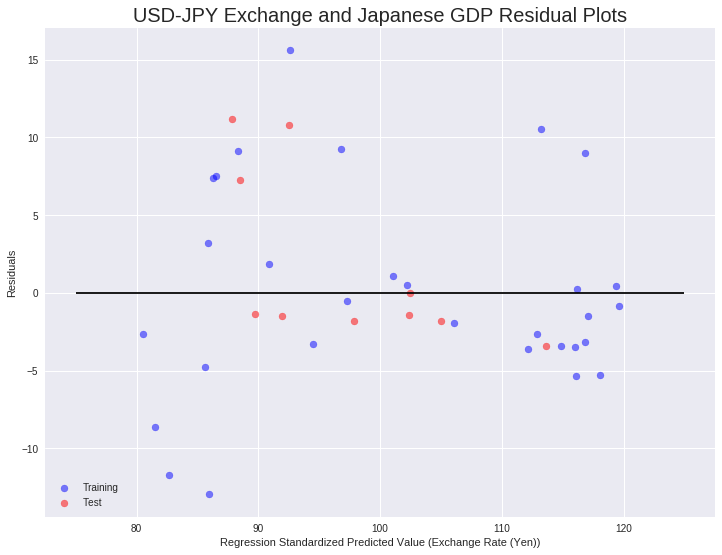

In [47]:
#Residual

train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)

#Plot a horizontal line axis

plt.hlines(y=0,xmin=75,xmax=125)

plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('USD-JPY Exchange and Japanese GDP Residual Plots',fontsize=20)

plt.xlabel('Regression Standardized Predicted Value (Exchange Rate (Yen))')

plt.ylabel('Residuals')

### Conclusion 

Japanese GDP has a significant and positive relationship with the USD-Yen Exchange rate. Positive changes in GDP correspond with positive changes in the Exchange rate. The regression plot demonstrates the linear nature of the relationship between these variables.

The low p-value of the hypothesis test allows for a confident rejection (or non acceptance) of the null hypothesis. The Root Mean Squared Error and the Residual Standard Error terms are both quit small (about 6.3 yen), so it is fair to assume they indicate that this model fits the data well. The high R squared term indicates this as well.

The Residual Plot is basically random with no major data structures and helps indicate linearity. The linear model created for this analysis ((Yen-Dollar Exchange) = a + b(Japan_GDP)) can be used to predict the Exchange rate at any value of GDP. People who are interested in, or are dependent on, the USD-Yen exchange rate will need to pay attention to GDP as well.
 